### 4 voter model

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import random as rd
import numpy as np

N = 100
N = 100
m = 3
p = 0.6
g = nx.powerlaw_cluster_graph(N,m,p)
g.pos = nx.spring_layout(g)

steps = 10_000

def run_voter_model(g, p, steps ,show_output = False):

    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rd.random() < p else 0

    for step in range(steps):
        listener = rd.choice(list(g.nodes))
        neighbors = list(g.neighbors(listener))
        if len(neighbors) == 0:
            continue
        speaker = rd.choice(neighbors)
        # Update the listener's state to match the speaker's state
        g.nodes[listener]['state'] = g.nodes[speaker]['state']
        states = [g.nodes[v]['state'] for v in nx.nodes(g)]
        variance = np.var(states)   
        # total_opinion = sum(votes)
        consensus_fraction = sum(states) / g.number_of_nodes()
        if variance == 0:
            if show_output:        
                print(f"consensus {consensus_fraction} reached at {step} variance {variance}")
            return step, consensus_fraction
            break

    return (steps, consensus_fraction)
step, consensus_fraction = run_voter_model(g,p, steps, True)



consensus 0.0 reached at 6087 variance 0.0


In [38]:
import matplotlib.pyplot as plt
#
def run_simulations(g, p, steps):
    res = []
    for i in range(5):
        res.append(run_voter_model(g,p, steps=steps))
    return res

def plot_sim(res):


    # Plot the scatter plot of consensus times
    plt.figure(figsize=(10, 6))
    plt.scatter( [result[0] for result in res], [result[1] for result in res], color='blue', alpha=0.6)

    plt.grid(True)
    plt.show()


4. 


### 4a. 

The dependency network graph from 3 was used first as an undirected graph

After a few runs with different initial conditions, consensus is reached in less than 10,000 steps. What is observed is that the time to reach consensus isn't different but the direction of consensus moves toward one side when changing the initial conditions of probability of a side


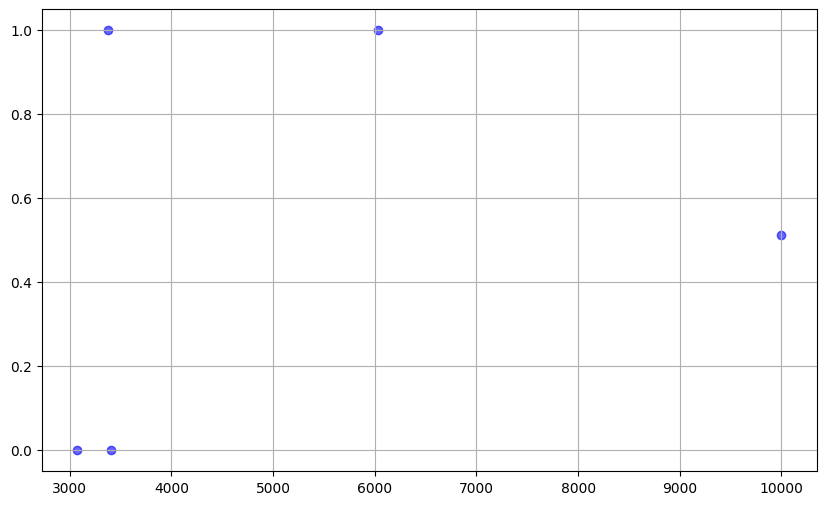

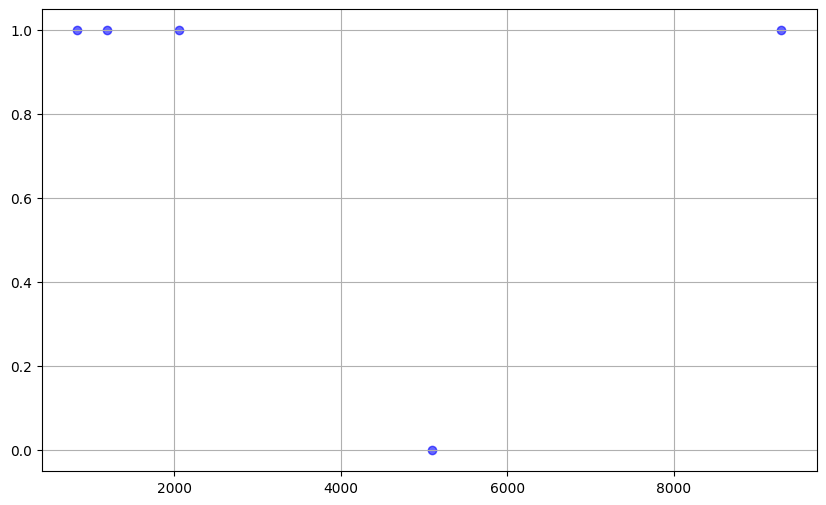

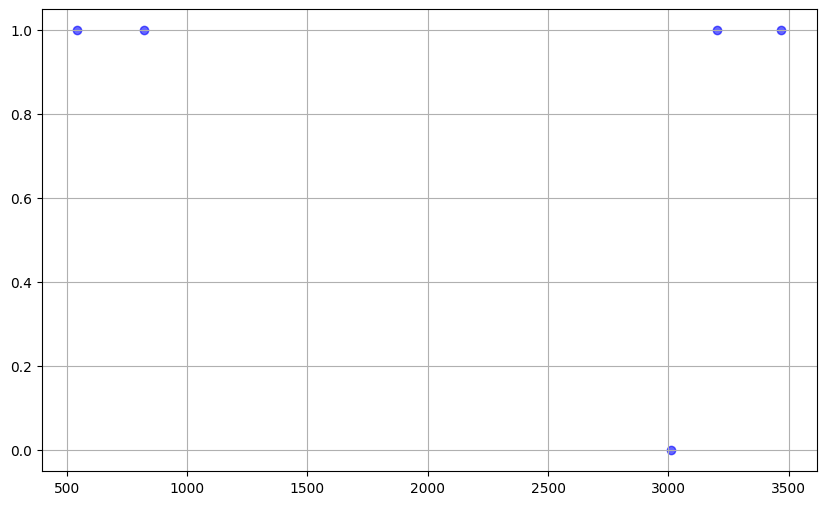

In [65]:
import networkx as nx

g = nx.Graph( nx.read_graphml("dependency_graph.graphml"))
plot_sim(run_simulations(g, 0.5, steps=10_000))

g = nx.Graph( nx.read_graphml("dependency_graph.graphml"))
plot_sim(run_simulations(g, 0.6, steps=10_000))

g = nx.Graph( nx.read_graphml("dependency_graph.graphml"))
plot_sim(run_simulations(g, 0.8, steps=10_000))



As a directed graph consensus was not reached. This may because direction limits the possibility of a neighboring node, a relationship where direction in the network determines who can influence who.

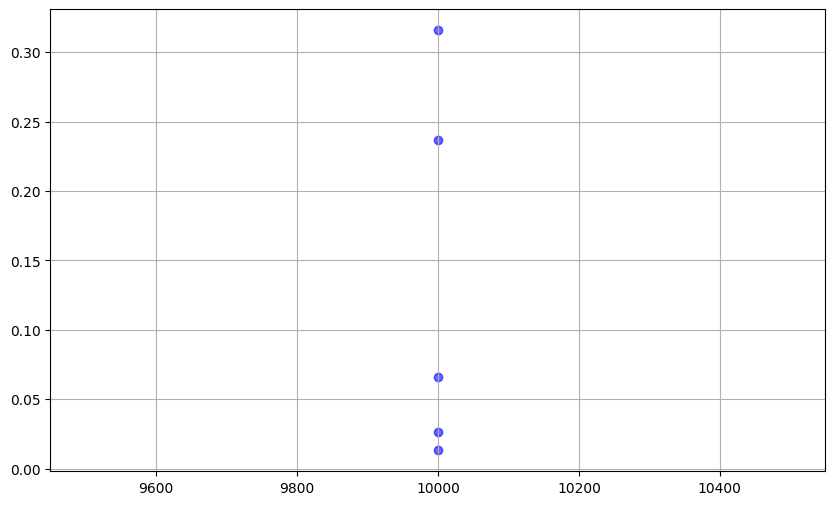

In [61]:
g = nx.DiGraph( nx.read_graphml("dependency_graph.graphml"))
plot_sim(run_simulations(g, 0.2, steps=10_000))

4b. We may expect that the connections will be more random, and a higher clustering coefficient, because package dependencies are ordinarily hierarchical by design, i.e. a package dependency does not need another edge to a package further up the hierarchy. Self loops and cycles are also possible whereas not so in the dependency graph. 

0.07594239102736319


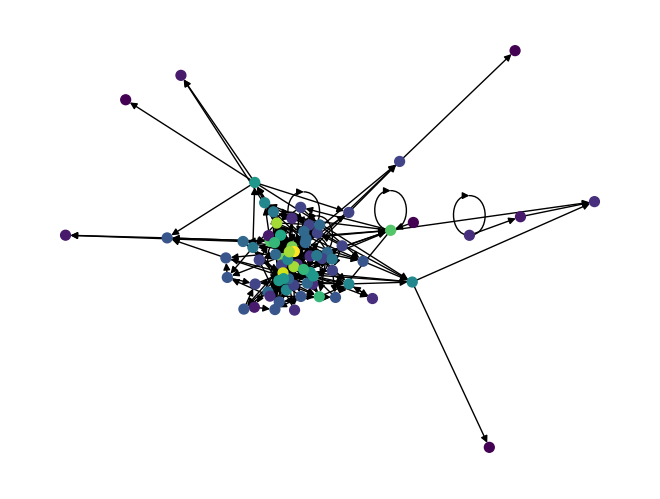

In [95]:
#Degree-preserving randomization
import networkx as nx
import numpy as np
import random

G_cm = nx.create_empty_copy(g)

#rewire the network
#shuffle degrees
stubs = []
for e in g.edges():
  stubs.append(e[0])
  stubs.append(e[1])


np.random.shuffle(stubs)
firststubs = stubs[0::2] # select elements in even entries
secondstubs = stubs[1::2] # select elements in odd entries
#connect degrees by pairs
for e in range(len(firststubs)):
  G_cm.add_edge(firststubs[e],secondstubs[e])

from itertools import count
for n in G_cm.nodes:
    degree = G_cm.degree(n)
    G_cm.nodes[n]['state'] = degree
groups = set(nx.get_node_attributes(G_cm,'state').values())
mapping = dict(zip(sorted(groups),count()))
colors = [mapping[G_cm.nodes[n]['state']] for n in G_cm.nodes()]

nx.draw(G_cm, with_labels=False, node_size=50, pos=nx.fruchterman_reingold_layout(G_cm), node_color=colors)
print(nx.average_clustering(G_cm))


In [96]:
import networkx as nx
import matplotlib.pyplot as plt

def analyze_graph_metrics(G):
    # 1. Clustering Coefficient
    avg_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    print(f"Average Clustering Coefficient: {avg_clustering}")
    print(f"Global Clustering Coefficient (Transitivity): {transitivity}")
    
    # 2. Degree Distribution
    degrees = [deg for _, deg in G.degree()]
    plt.figure()
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), color='skyblue', edgecolor='black')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()
    
    
# Example usage (assuming G is your graph)
# G = nx.karate_club_graph()  # Example graph
# analyze_graph_metrics(G)


Average Clustering Coefficient: 0.07594239102736319
Global Clustering Coefficient (Transitivity): 0.0631768953068592


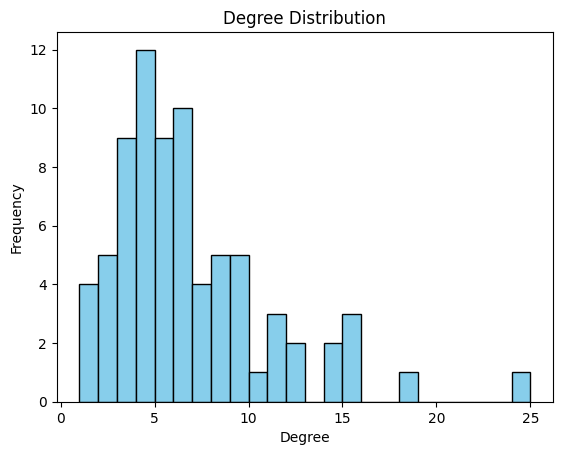

In [97]:
analyze_graph_metrics(G_cm)

For the directed dependency graph we see more nodes of outdegree 0 and fewer cycles.

Average Clustering Coefficient: 0.20275500356769707
Global Clustering Coefficient (Transitivity): 0.174


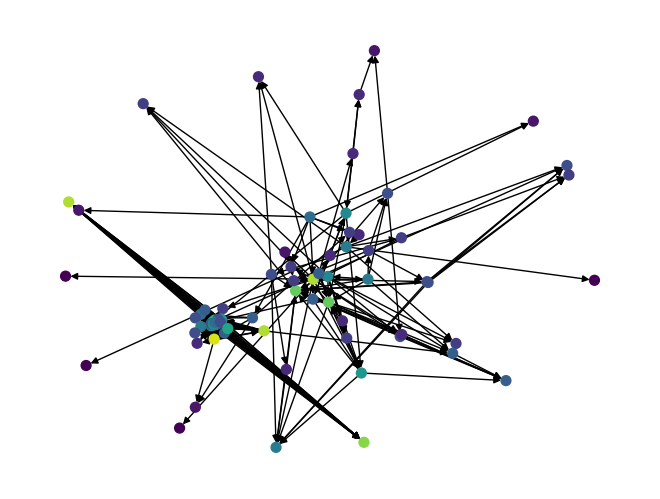

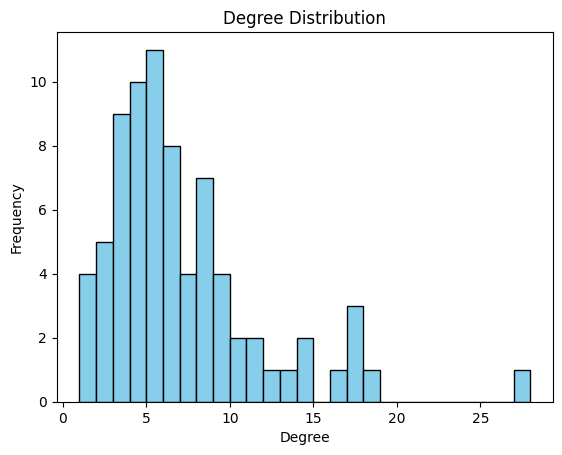

In [98]:
from itertools import count

g = nx.DiGraph( nx.read_graphml("dependency_graph.graphml"))

for n in g.nodes:
    degree = g.degree(n)
    g.nodes[n]['state'] = degree
groups = set(nx.get_node_attributes(g,'state').values())
mapping = dict(zip(sorted(groups),count()))
colors = [mapping[g.nodes[n]['state']] for n in g.nodes()]

nx.draw(g, with_labels=False, node_size=50, pos=nx.fruchterman_reingold_layout(g), node_color=colors)

analyze_graph_metrics(g)